In [106]:
import csv
import json
import math
from collections import defaultdict
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm


In [2]:
LANGUAGES = {
    "python": "Python",
    "r": "R",
    "javascript": "Javascript",
    "java": "Java",
    "cpp": "C++",
    "php": "PHP",
    "ruby": "Ruby",
    "perl": "Perl",
    "rust": "Rust",
    "swift": "Swift",
    "objectivec": "Objective C",
    "c#": "C#",
}


In [25]:
for language in LANGUAGES:
    print(f"PROCESSING {language.upper()}")
    data = None
    with open(f"data/results/{language}/{language}_{language}_post_stats.json") as handle:
        data = json.load(handle)

    library_to_post = defaultdict(set)
    pair_to_post = defaultdict(set)
    library_to_pair = defaultdict(set)
    
    for post in tqdm(data):
        imports = post.get("imports", [])
        for lib in imports:
            library_to_post[lib].add(post["id"])
        for pair in combinations(imports, 2):
            pair_to_post[pair].add(post["id"])
    
            lib1, lib2 = pair
            library_to_pair[lib1].add(pair)
            library_to_pair[lib2].add(pair)
    
    library_to_post = {k: list(v) for k, v in library_to_post.items()}
    pair_to_post = {"|".join(k): list(v) for k, v in pair_to_post.items()}
    library_to_pair = {"|".join(k): list(v) for k, v in library_to_pair.items()}
    
    print(f"\t{language} library to post...")
    with open(f"data/results/{language}/{language}_library_to_post.json", "w") as handle:
        json.dump(library_to_post, handle)
    print(f"\t{language} pair to post...")
    with open(f"data/results/{language}/{language}_pair_to_post.json", "w") as handle:
        json.dump(pair_to_post, handle)
    print(f"\t{language} library to pair...")
    with open(f"data/results/{language}/{language}_library_to_pair.json", "w") as handle:
        json.dump(library_to_pair, handle)
    
    library_to_post_count = [(k, len(v)) for k, v in library_to_post.items()]
    ordered_library_to_post = sorted(library_to_post_count, key=lambda item: item[1], reverse=True)
    
    print(f"\t{language} ordered library to post count...")
    with open(f"data/results/{language}/{language}_ordered_library_to_post_count.json", "w") as handle:
        json.dump(ordered_library_to_post, handle)

PROCESSING PYTHON


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1358392/1358392 [00:05<00:00, 251654.41it/s]


	python library to post...
	python pair to post...
	python library to pair...
	python ordered library to post count...
PROCESSING R


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 327074/327074 [00:00<00:00, 340724.07it/s]


	r library to post...
	r pair to post...
	r library to pair...
	r ordered library to post count...
PROCESSING JAVASCRIPT


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 233986/233986 [00:01<00:00, 161099.17it/s]


	javascript library to post...
	javascript pair to post...
	javascript library to pair...
	javascript ordered library to post count...
PROCESSING JAVA


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 315370/315370 [00:00<00:00, 473941.57it/s]


	java library to post...
	java pair to post...
	java library to pair...
	java ordered library to post count...
PROCESSING CPP


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54579/54579 [00:00<00:00, 125969.61it/s]


	cpp library to post...
	cpp pair to post...
	cpp library to pair...
	cpp ordered library to post count...
PROCESSING PHP


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 114198/114198 [00:00<00:00, 533864.54it/s]


	php library to post...
	php pair to post...
	php library to pair...
	php ordered library to post count...
PROCESSING RUBY


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37682/37682 [00:00<00:00, 423496.56it/s]


	ruby library to post...
	ruby pair to post...
	ruby library to pair...
	ruby ordered library to post count...
PROCESSING PERL


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50826/50826 [00:00<00:00, 121506.88it/s]


	perl library to post...
	perl pair to post...
	perl library to pair...
	perl ordered library to post count...
PROCESSING RUST


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21836/21836 [00:00<00:00, 69993.27it/s]


	rust library to post...
	rust pair to post...
	rust library to pair...
	rust ordered library to post count...
PROCESSING SWIFT


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52612/52612 [00:00<00:00, 408902.40it/s]


	swift library to post...
	swift pair to post...
	swift library to pair...
	swift ordered library to post count...
PROCESSING OBJECTIVEC


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15801/15801 [00:00<00:00, 67754.57it/s]


	objectivec library to post...
	objectivec pair to post...
	objectivec library to pair...
	objectivec ordered library to post count...
PROCESSING C#


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126252/126252 [00:00<00:00, 515819.50it/s]


	c# library to post...
	c# pair to post...
	c# library to pair...
	c# ordered library to post count...


In [87]:
cmap = plt.get_cmap("tab20")  # qualitative, many distinct colors
color_map = {
    lang: cmap(i) for i, lang in enumerate(LANGUAGES)
}

TOP_N = [1, 5, 10, 25, 50, 100, 200, 500, 1000]

# Calculate post disruption
count posts containing at least one top-N library, divide by total posts

In [88]:
post_top_n = {language: {} for language in LANGUAGES}
for language in tqdm(LANGUAGES):
    with open(f"data/results/{language}/{language}_ordered_library_to_post_count.json") as handle:
        ordered_library_to_post_count = json.load(handle)
    
    with open(f"data/results/{language}/{language}_library_to_post.json") as handle:
        library_to_post = json.load(handle)

    post_collector = set()
    for lib, posts in library_to_post.items():
        post_collector |= set(posts)
    
    for N in TOP_N:
        target_libs = [item[0] for item in ordered_library_to_post_count[:N]]
        collected_posts = set()
        for target_lib in target_libs:
            collected_posts |= set(library_to_post.get(target_lib, []))
        post_top_n[language][N] = round(len(collected_posts)/ len(post_collector), 3)
post_top_n

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.49it/s]


{'python': {1: 0.143,
  5: 0.358,
  10: 0.513,
  25: 0.698,
  50: 0.787,
  100: 0.859,
  200: 0.9,
  500: 0.94,
  1000: 0.958},
 'r': {1: 0.253,
  5: 0.612,
  10: 0.666,
  25: 0.738,
  50: 0.802,
  100: 0.851,
  200: 0.899,
  500: 0.942,
  1000: 0.965},
 'javascript': {1: 0.245,
  5: 0.466,
  10: 0.511,
  25: 0.62,
  50: 0.695,
  100: 0.766,
  200: 0.814,
  500: 0.869,
  1000: 0.903},
 'java': {1: 0.759,
  5: 0.961,
  10: 0.979,
  25: 0.985,
  50: 0.987,
  100: 0.99,
  200: 0.992,
  500: 0.995,
  1000: 0.996},
 'cpp': {1: 0.121,
  5: 0.187,
  10: 0.234,
  25: 0.3,
  50: 0.349,
  100: 0.415,
  200: 0.48,
  500: 0.566,
  1000: 0.63},
 'php': {1: 0.114,
  5: 0.265,
  10: 0.381,
  25: 0.489,
  50: 0.564,
  100: 0.632,
  200: 0.695,
  500: 0.759,
  1000: 0.804},
 'ruby': {1: 0.096,
  5: 0.257,
  10: 0.38,
  25: 0.561,
  50: 0.682,
  100: 0.774,
  200: 0.841,
  500: 0.905,
  1000: 0.939},
 'perl': {1: 0.626,
  5: 0.71,
  10: 0.754,
  25: 0.84,
  50: 0.898,
  100: 0.947,
  200: 0.974,
  500: 

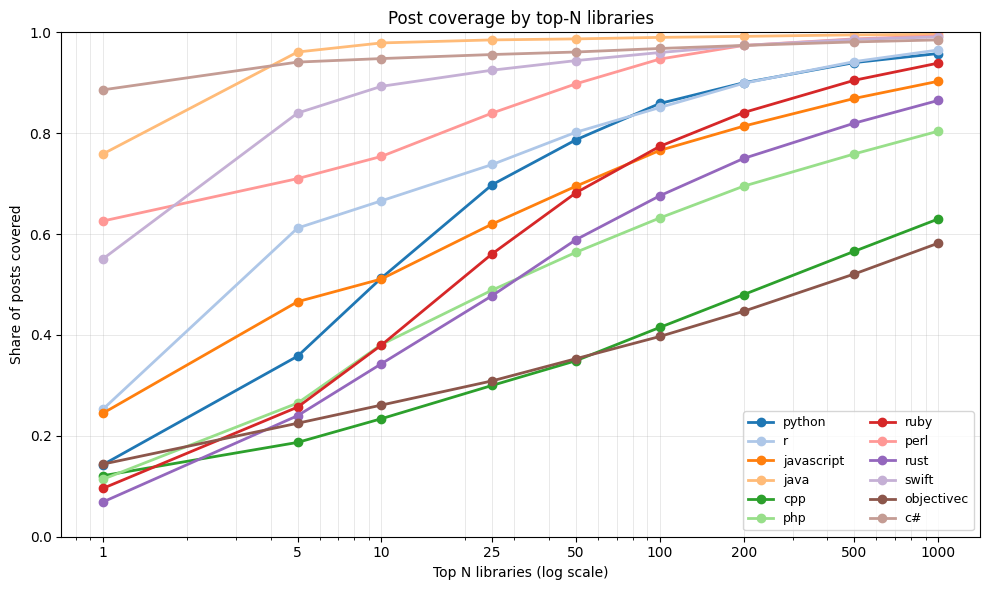

In [89]:
plt.figure(figsize=(10, 6))

for lang in LANGUAGES:
    ys = [post_top_n[lang].get(n, float("nan")) for n in TOP_N]
    plt.plot(
        TOP_N,
        ys,
        marker="o",
        linewidth=2,
        color=color_map[lang],
        label=lang
    )

plt.xscale("log")
plt.xticks(TOP_N, [str(n) for n in TOP_N])
plt.ylim(0, 1)

plt.xlabel("Top N libraries (log scale)")
plt.ylabel("Share of posts covered")
plt.title("Post coverage by top-N libraries")
plt.grid(True, which="both", linewidth=0.5, alpha=0.4)

plt.legend(loc="best", fontsize=9, ncol=2)
plt.tight_layout()
plt.show()

# Calculate pair disruption (unique):
count unique pairs where at least one member is in top N, divide by total unique pairs

In [90]:
unique_pairs_top_n = {language: {} for language in LANGUAGES}
for language in tqdm(LANGUAGES):
    with open(f"data/results/{language}/{language}_ordered_library_to_post_count.json") as handle:
        ordered_library_to_post_count = json.load(handle)
    
    with open(f"data/results/{language}/{language}_pair_to_post.json") as handle:
        pair_to_post = json.load(handle)

    unique_pairs = list(pair_to_post.keys())
    
    for N in TOP_N:
        target_libs = set([item[0] for item in ordered_library_to_post_count[:N]])
        pairs_with_top_n = [item for item in unique_pairs if item.split("|")[0] in target_libs or item.split("|")[1] in target_libs]

        unique_pairs_top_n[language][N] = round(len(pairs_with_top_n)/ len(unique_pairs), 3)
unique_pairs_top_n

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:06<00:00,  1.78it/s]


{'python': {1: 0.025,
  5: 0.129,
  10: 0.21,
  25: 0.321,
  50: 0.451,
  100: 0.571,
  200: 0.691,
  500: 0.8,
  1000: 0.854},
 'r': {1: 0.033,
  5: 0.129,
  10: 0.19,
  25: 0.302,
  50: 0.446,
  100: 0.59,
  200: 0.723,
  500: 0.852,
  1000: 0.914},
 'javascript': {1: 0.047,
  5: 0.135,
  10: 0.193,
  25: 0.306,
  50: 0.422,
  100: 0.524,
  200: 0.643,
  500: 0.783,
  1000: 0.857},
 'java': {1: 0.288,
  5: 0.691,
  10: 0.771,
  25: 0.815,
  50: 0.849,
  100: 0.882,
  200: 0.913,
  500: 0.944,
  1000: 0.961},
 'cpp': {1: 0.045,
  5: 0.089,
  10: 0.106,
  25: 0.149,
  50: 0.188,
  100: 0.24,
  200: 0.315,
  500: 0.424,
  1000: 0.504},
 'php': {1: 0.046,
  5: 0.122,
  10: 0.188,
  25: 0.281,
  50: 0.339,
  100: 0.406,
  200: 0.477,
  500: 0.559,
  1000: 0.611},
 'ruby': {1: 0.083,
  5: 0.182,
  10: 0.276,
  25: 0.452,
  50: 0.623,
  100: 0.733,
  200: 0.831,
  500: 0.893,
  1000: 0.922},
 'perl': {1: 0.112,
  5: 0.299,
  10: 0.364,
  25: 0.571,
  50: 0.757,
  100: 0.888,
  200: 0.937,
 

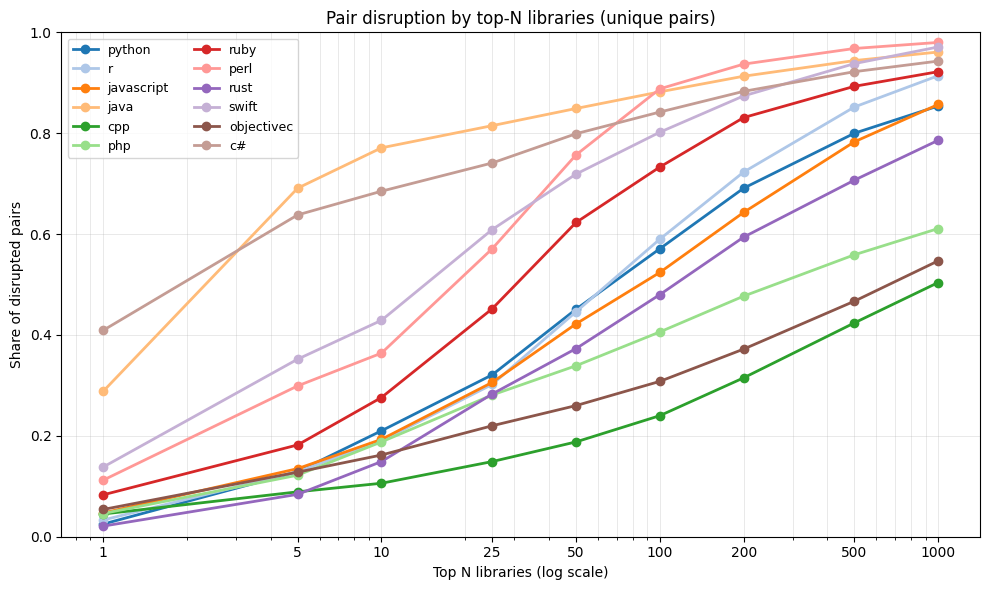

In [91]:
plt.figure(figsize=(10, 6))

for lang in LANGUAGES:
    if lang not in unique_pairs_top_n:
        continue  # optional safety

    ys = [unique_pairs_top_n[lang].get(n, float("nan")) for n in TOP_N]
    plt.plot(
        TOP_N,
        ys,
        marker="o",
        linewidth=2,
        color=color_map[lang],
        label=lang
    )

plt.xscale("log")
plt.xticks(TOP_N, [str(n) for n in TOP_N])
plt.ylim(0, 1)

plt.xlabel("Top N libraries (log scale)")
plt.ylabel("Share of disrupted pairs")
plt.title("Pair disruption by top-N libraries (unique pairs)")
plt.grid(True, which="both", linewidth=0.5, alpha=0.4)

plt.legend(loc="best", fontsize=9, ncol=2)
plt.tight_layout()
plt.show()

# Calculate pair disruption (weighted):
sum occurrences of pairs where at least one member is in top N, divide by total pair occurrences

In [92]:
weighted_unique_pairs_top_n = {language: {} for language in LANGUAGES}
for language in tqdm(LANGUAGES):
    with open(f"data/results/{language}/{language}_ordered_library_to_post_count.json") as handle:
        ordered_library_to_post_count = json.load(handle)
    
    with open(f"data/results/{language}/{language}_pair_to_post.json") as handle:
        pair_to_post = json.load(handle)

    unique_pairs = list(pair_to_post.keys())
    unique_pairs_weighted_sum = sum([len(item) for item in pair_to_post.values()])
    
    for N in TOP_N:
        target_libs = set([item[0] for item in ordered_library_to_post_count[:N]])
        pairs_with_top_n = [item for item in unique_pairs if item.split("|")[0] in target_libs or item.split("|")[1] in target_libs]
        pairs_with_top_n_weight_sum = sum(len(pair_to_post[lib]) for lib in pairs_with_top_n)

        weighted_unique_pairs_top_n[language][N] = round(pairs_with_top_n_weight_sum / unique_pairs_weighted_sum, 3)
        
weighted_unique_pairs_top_n

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.63it/s]


{'python': {1: 0.136,
  5: 0.418,
  10: 0.595,
  25: 0.732,
  50: 0.831,
  100: 0.885,
  200: 0.929,
  500: 0.957,
  1000: 0.969},
 'r': {1: 0.2,
  5: 0.503,
  10: 0.585,
  25: 0.705,
  50: 0.809,
  100: 0.877,
  200: 0.926,
  500: 0.965,
  1000: 0.981},
 'javascript': {1: 0.166,
  5: 0.392,
  10: 0.49,
  25: 0.631,
  50: 0.738,
  100: 0.806,
  200: 0.877,
  500: 0.937,
  1000: 0.962},
 'java': {1: 0.635,
  5: 0.968,
  10: 0.98,
  25: 0.987,
  50: 0.989,
  100: 0.992,
  200: 0.994,
  500: 0.997,
  1000: 0.998},
 'cpp': {1: 0.065,
  5: 0.124,
  10: 0.152,
  25: 0.206,
  50: 0.254,
  100: 0.309,
  200: 0.389,
  500: 0.501,
  1000: 0.577},
 'php': {1: 0.068,
  5: 0.182,
  10: 0.291,
  25: 0.403,
  50: 0.46,
  100: 0.536,
  200: 0.602,
  500: 0.679,
  1000: 0.723},
 'ruby': {1: 0.194,
  5: 0.402,
  10: 0.516,
  25: 0.678,
  50: 0.806,
  100: 0.884,
  200: 0.934,
  500: 0.961,
  1000: 0.972},
 'perl': {1: 0.471,
  5: 0.8,
  10: 0.838,
  25: 0.924,
  50: 0.966,
  100: 0.986,
  200: 0.993,
  

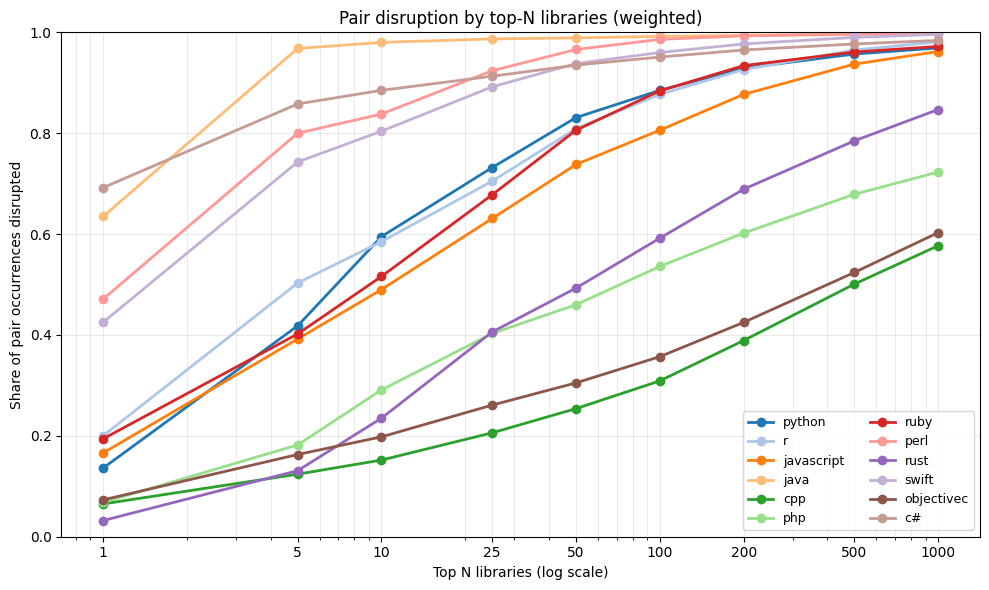

In [93]:
plt.figure(figsize=(10, 6))

for lang in LANGUAGES:
    ys = [weighted_unique_pairs_top_n[lang].get(n, float("nan")) for n in TOP_N]
    plt.plot(
        TOP_N,
        ys,
        marker="o",
        linewidth=2,
        color=color_map[lang],
        label=lang
    )

plt.xscale("log")
plt.xticks(TOP_N, [str(n) for n in TOP_N])
plt.ylim(0, 1)

plt.xlabel("Top N libraries (log scale)")
plt.ylabel("Share of pair occurrences disrupted")
plt.title("Pair disruption by top-N libraries (weighted)")
plt.grid(True, which="both", linewidth=0.5, alpha=0.4)

plt.legend(loc="best", fontsize=9, ncol=2)
plt.tight_layout()
plt.show()

# Top library contribution to unique pairs

In [105]:
language_to_sequences = {}

for language in LANGUAGES:
    with open(f"data/results/{language}/{language}_ordered_library_to_post_count.json") as handle:
        ordered_library_to_post_count = json.load(handle)
        ordered_library_to_post_count_dict = dict(ordered_library_to_post_count)
    
    with open(f"data/results/{language}/{language}_pair_to_post.json") as handle:
        pair_to_post = json.load(handle)

    pair_contrib_count = defaultdict(int)
   
    incorrect_pair_count = 0
    for pair in pair_to_post:
        libs = pair.split("|")
        if len(libs) != 2:
            incorrect_pair_count += 1
            continue
        for lib in libs:
            pair_contrib_count[lib] += 1
    print(f"Language {language}, incorrect pairs: {incorrect_pair_count}")

    target_libs = set([item[0] for item in ordered_library_to_post_count[:N]])
    collector = []
    for target_lib in target_libs:
        collector.append({
            "library": target_lib,
            "library_count": ordered_library_to_post_count_dict[target_lib],
            "pair_count": pair_contrib_count[target_lib],
        })
    language_to_sequences[language] = collector

    

Language python, incorrect pairs: 13
Language r, incorrect pairs: 4
Language javascript, incorrect pairs: 7
Language java, incorrect pairs: 0
Language cpp, incorrect pairs: 0
Language php, incorrect pairs: 15
Language ruby, incorrect pairs: 0
Language perl, incorrect pairs: 0
Language rust, incorrect pairs: 0
Language swift, incorrect pairs: 0
Language objectivec, incorrect pairs: 0
Language c#, incorrect pairs: 0


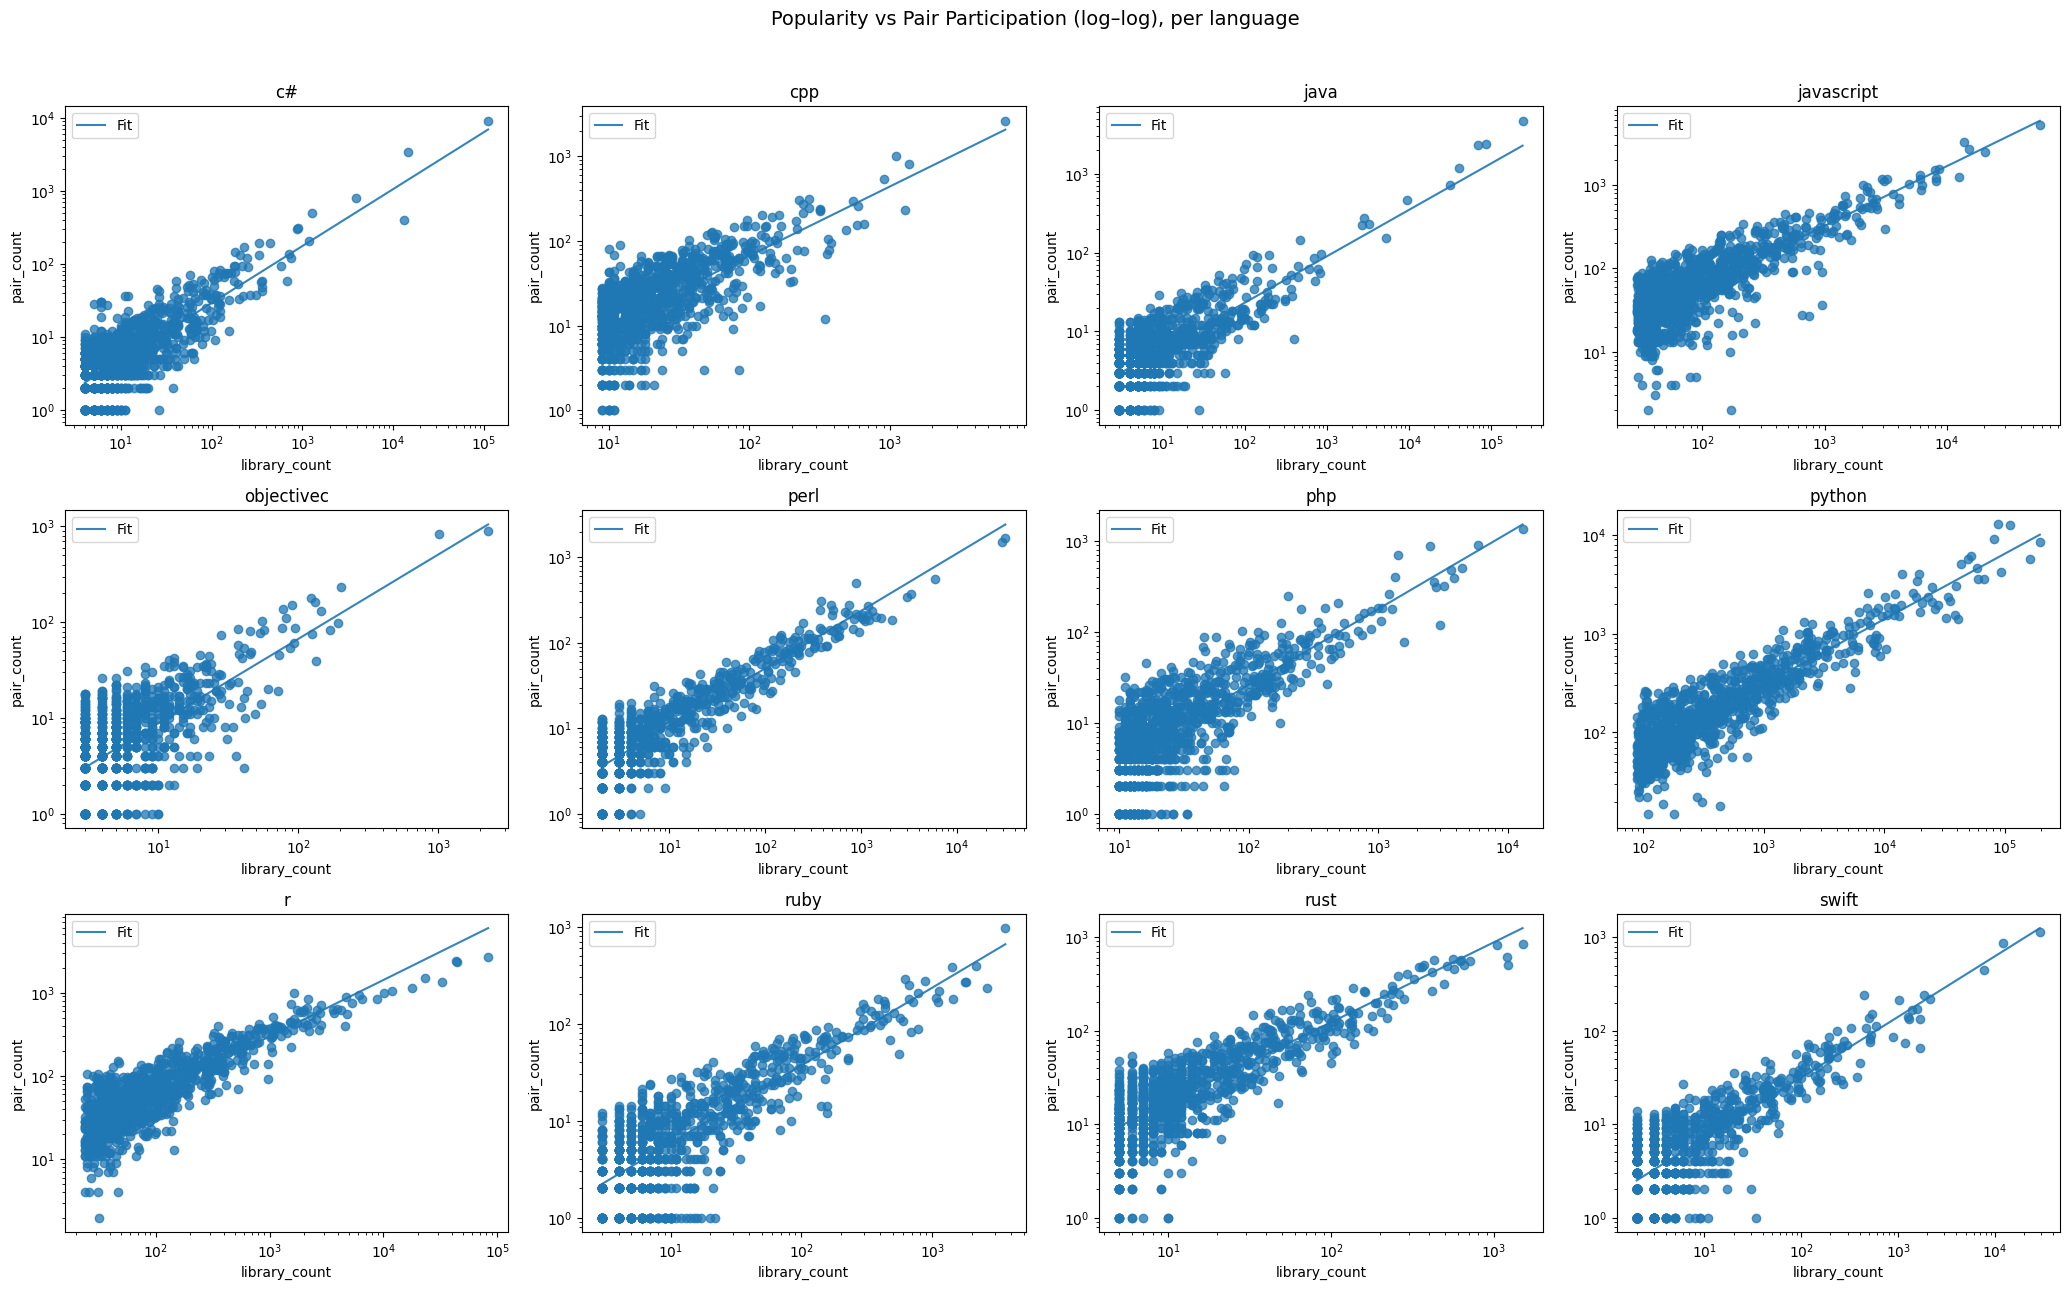

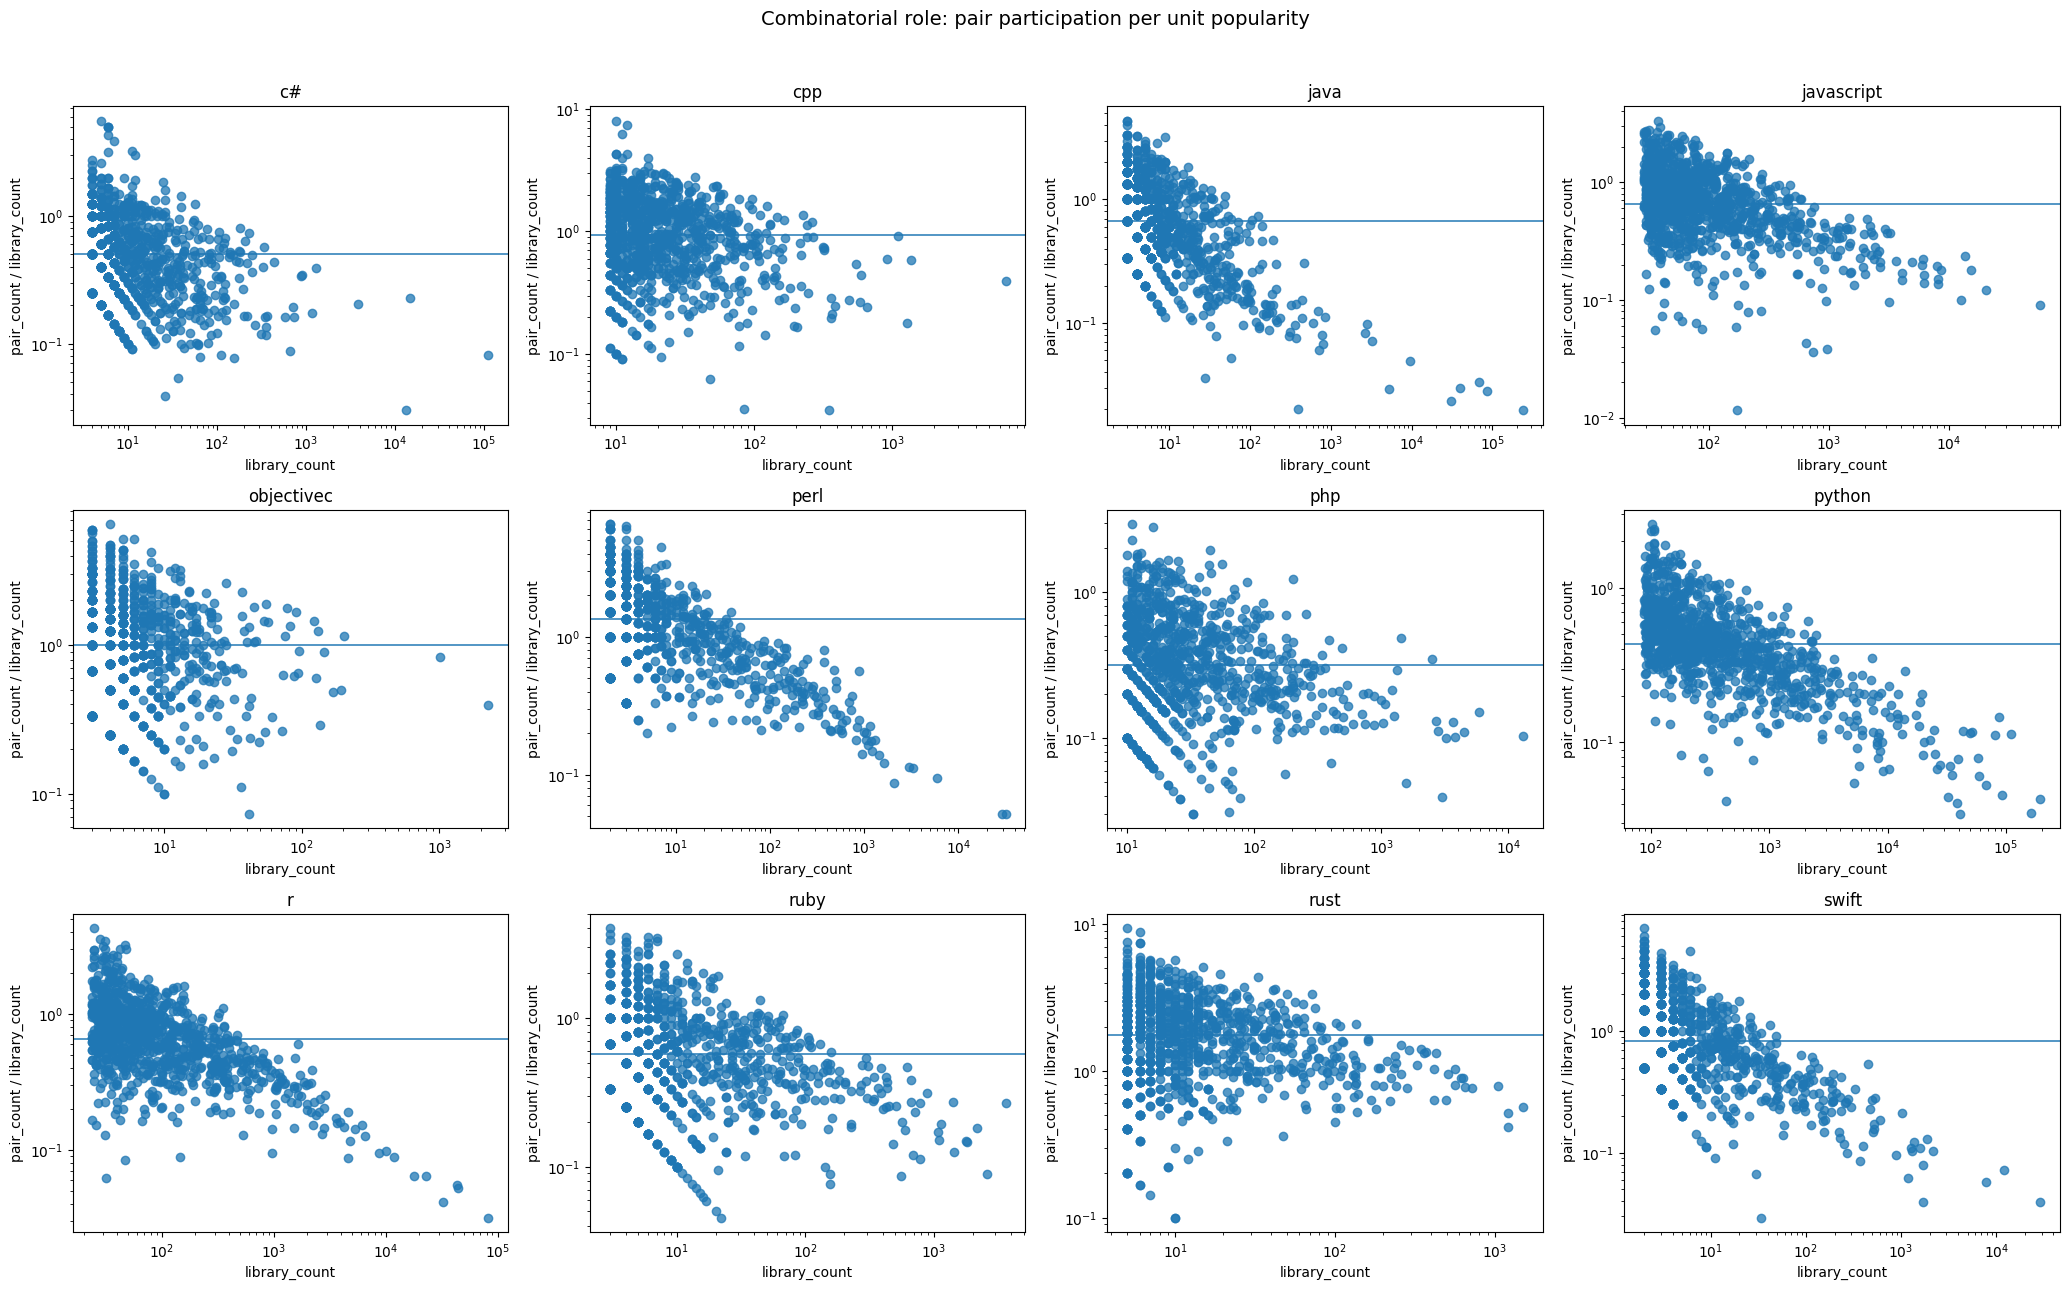

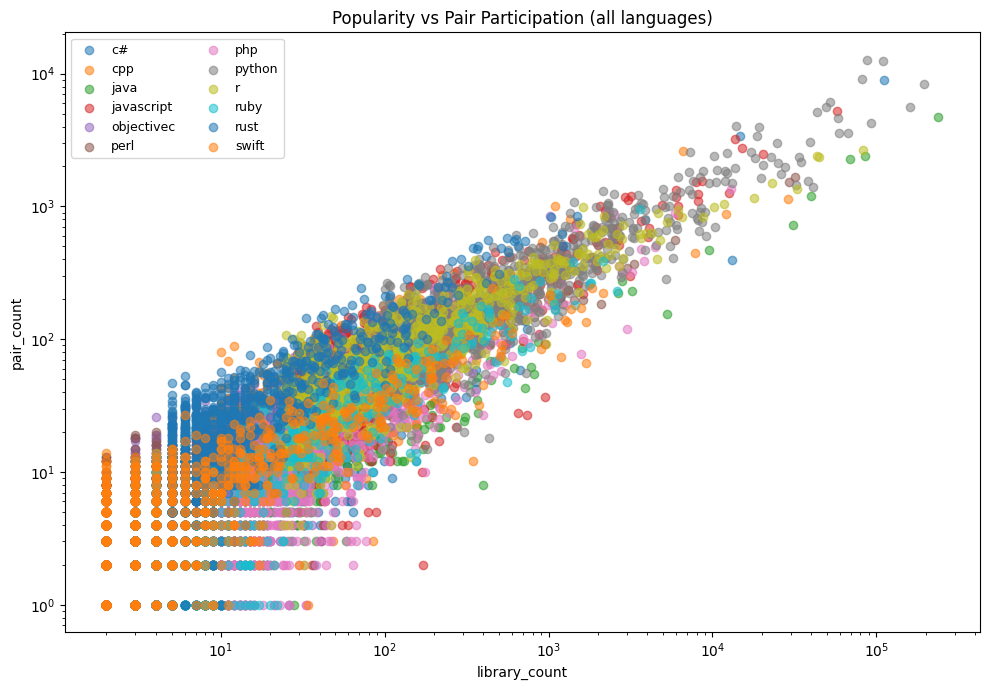

In [109]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Assumes you already built:
# language_to_sequences[language] = [
#     {"library": ..., "library_count": int, "pair_count": int}, ...
# ]
# ------------------------------------------------------------

def to_df(language_to_sequences: dict) -> pd.DataFrame:
    rows = []
    for lang, seq in language_to_sequences.items():
        for item in seq:
            rows.append({
                "language": lang,
                "library": item["library"],
                "library_count": int(item["library_count"]),
                "pair_count": int(item["pair_count"]),
            })
    df = pd.DataFrame(rows)

    # basic guards
    df = df[(df["library_count"] > 0) & (df["pair_count"] > 0)].copy()
    df["pair_ratio"] = df["pair_count"] / df["library_count"]
    df["log_library_count"] = np.log10(df["library_count"])
    df["log_pair_count"] = np.log10(df["pair_count"])
    return df


def grid(n_panels: int, max_cols: int = 4):
    cols = min(max_cols, n_panels)
    rows = math.ceil(n_panels / cols)
    return rows, cols


df = to_df(language_to_sequences)
languages = sorted(df["language"].unique())

# ============================================================
# FIGURE 1: Log–log scatter, small multiples by language
# Popularity vs pair participation
# ============================================================

rows, cols = grid(len(languages), max_cols=4)
fig, axes = plt.subplots(
    rows, cols,
    figsize=(5.2 * cols, 4.2 * rows),
    sharex=False, sharey=False
)
axes = np.array(axes).reshape(-1)

for i, lang in enumerate(languages):
    ax = axes[i]
    sub = df[df["language"] == lang]

    ax.scatter(sub["library_count"], sub["pair_count"], alpha=0.75)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(lang)
    ax.set_xlabel("library_count")
    ax.set_ylabel("pair_count")

    # log–log fit line (scaling intuition)
    x = sub["log_library_count"].to_numpy()
    y = sub["log_pair_count"].to_numpy()
    if len(sub) >= 3:
        slope, intercept = np.polyfit(x, y, 1)
        x_line = np.linspace(x.min(), x.max(), 100)
        y_line = slope * x_line + intercept
        ax.plot(10**x_line, 10**y_line, linewidth=1.5, alpha=0.9, label="Fit")

        ax.legend()

# hide unused panels
for j in range(len(languages), len(axes)):
    axes[j].axis("off")

fig.suptitle(
    "Popularity vs Pair Participation (log–log), per language",
    y=1.02,
    fontsize=14
)
fig.tight_layout()

fig.savefig(
    "fig_1_popularity_vs_pair_participation_per_language.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# ============================================================
# FIGURE 2: Ratio plot (pair_count / library_count)
# Small multiples by language
# ============================================================

rows, cols = grid(len(languages), max_cols=4)
fig, axes = plt.subplots(
    rows, cols,
    figsize=(5.2 * cols, 4.2 * rows),
    sharex=False, sharey=False
)
axes = np.array(axes).reshape(-1)

for i, lang in enumerate(languages):
    ax = axes[i]
    sub = df[df["language"] == lang].sort_values("library_count")

    ax.scatter(sub["library_count"], sub["pair_ratio"], alpha=0.75)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(lang)
    ax.set_xlabel("library_count")
    ax.set_ylabel("pair_count / library_count")

    # reference line: language median
    med = np.median(sub["pair_ratio"])
    ax.axhline(med, linewidth=1.2, alpha=0.9)

for j in range(len(languages), len(axes)):
    axes[j].axis("off")

fig.suptitle(
    "Combinatorial role: pair participation per unit popularity",
    y=1.02,
    fontsize=14
)
fig.tight_layout()

fig.savefig(
    "fig_2_pair_ratio_per_language.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# ============================================================
# FIGURE 3: All languages together (overview, can be noisy)
# ============================================================

fig = plt.figure(figsize=(10, 7))

for lang in languages:
    sub = df[df["language"] == lang]
    plt.scatter(
        sub["library_count"],
        sub["pair_count"],
        alpha=0.55,
        label=lang
    )

plt.xscale("log")
plt.yscale("log")
plt.xlabel("library_count")
plt.ylabel("pair_count")
plt.title("Popularity vs Pair Participation (all languages)")
plt.legend(ncol=2, fontsize=9)
plt.tight_layout()

fig.savefig(
    "fig_3_all_languages_popularity_vs_pairs.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

In [110]:
pwd

'/home/debian/SO_Post_Analyzer'